# **Final Project Task 5 - Census Modeling NN Regression**

Requirements

- Create a NN regression model on the Census dataset, with 'hours-per-week' target

- Model Selection and Setup:
    - Build a neural network model using a deep learning library like TensorFlow, Keras or PyTorch.
    - Choose a loss (or experiment with different losses) for the model and justify the choice.
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons.


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation
    - Establish a Baseline Model:
        - Train a simple NN model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable.
    - Feature Selection:
        - Neural Networks can learn feature importance automatically, so all relevant features should be included rather than manually selecting a subset.
        - Consider using embeddings for high-cardinality categorical features instead of one-hot encoding to improve efficiency.
    - Experimentation:
        - Focus on preprocessing techniques rather than manually selecting feature combinations. Ensure numerical features are normalized (e.g., MinMaxScaler, StandardScaler) and categorical features are properly encoded (e.g., one-hot encoding or embeddings for high-cardinality variables).
        - Experiment with different neural network architectures (e.g., number of layers, neurons per layer) and hyperparameters (e.g., activation functions, learning rates, dropout rates, and batch sizes).
        - Use techniques such as early stopping and learning rate scheduling to optimize model performance and prevent overfitting.
        - Identify the best model which have the best performance metrics on test set.
    - Hyperparameter Tuning:
        - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments.
        - Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
        - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
        - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation
    - Evaluate models on the test dataset using regression metrics:
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R² Score
    - Choose one metric for model comparison and explain your choice
    - Compare the results across different models. Save all experiment results into a table.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


In [4]:
import pandas as pd

In [5]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age         workclass  fnlwgt     education  education-num  \
1243    65  Self-emp-not-inc  167414       HS-grad              9   
18805   31                 ?  182191     Bachelors             13   
4364    29           Private  355569     Assoc-voc             11   
19066   53         Local-gov  231196       HS-grad              9   
1905    44           Private  161819       HS-grad              9   
19089   58       Federal-gov   30111  Some-college             10   
12868   46       Federal-gov   55237  Some-college             10   
7425    30           Private  299507    Assoc-acdm             12   
6157    55           Private  183884       HS-grad              9   
11961   38  Self-emp-not-inc  129573       Masters             14   

           marital-status         occupation   relationship  \
1243   Married-civ-spouse    Exec-managerial        Husband   
18805  Married-civ-spouse                  ?           Wife   
4364        Never-married    Exec-managerial      Unmarried   
19066  Married-civ-spouse       Adm-clerical        Husband   
1905   Married-civ-spouse  Machine-op-inspct        Husband   
19089             Widowed     Prof-specialty      Unmarried   
12868            Divorced  Machine-op-inspct      Unmarried   
7425            Separated      Other-service      Unmarried   
6157             Divorced       Craft-repair  Not-in-family   
11961       Never-married     Prof-specialty  Not-in-family   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
1243                White    Male             0             0              59   
18805               White  Female          4064             0              30   
4364                White  Female             0             0              50   
19066               White    Male             0             0              40   
1905                White    Male             0             0              40   
19089  Amer-Indian-Eskimo  Female             0             0              40   
12868               White    Male             0             0              40   
7425                White  Female             0             0              40   
6157                White    Male             0             0              45   
11961               White    Male             0             0              40   

      native-country income  
1243   United-States   >50K  
18805         Canada  <=50K  
4364   United-States  <=50K  
19066  United-States  <=50K  
1905   United-States   >50K  
19089  United-States  <=50K  
12868  United-States  <=50K  
7425   United-States  <=50K  
6157   United-States  <=50K  
11961  United-States   >50K

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(input_shape):
    model = Sequential([
        Dense(64, activation="relu", input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(32, activation="relu"),
        Dropout(0.2),
        Dense(16, activation="relu"),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mae"])
    return model

# Build the model
input_shape = X_train.shape[1]
model = build_model(input_shape)
model.summary()

c:\Users\Dan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,153 (35.75 KB)

 Trainable params: 9,153 (35.75 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - loss: 683.6367 - mae: 20.0104 - val_loss: 117.5071 - val_mae: 7.7803
Epoch 2/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - loss: 145.2006 - mae: 9.0638 - val_loss: 116.4195 - val_mae: 7.6171
Epoch 3/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step - loss: 132.7423 - mae: 8.5803 - val_loss: 112.5053 - val_mae: 7.5462
Epoch 4/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - loss: 130.4845 - mae: 8.5137 - val_loss: 111.9656 - val_mae: 7.4418
Epoch 5/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - loss: 129.9118 - mae: 8.5369 - val_loss: 108.5589 - val_mae: 7.3082
Epoch 6/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - loss: 127.3352 - mae: 8.3348 - val_loss: 108.2616 - val_mae: 7.2953
Epoch 7/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - loss: 123.4154 - mae: 8.2002 - val_loss: 107.8652 - val_mae: 7.2652
Epoch 8/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - loss: 123.9587 - mae: 8.1272 - val_loss: 106.7337 - val_mae: 7.2291

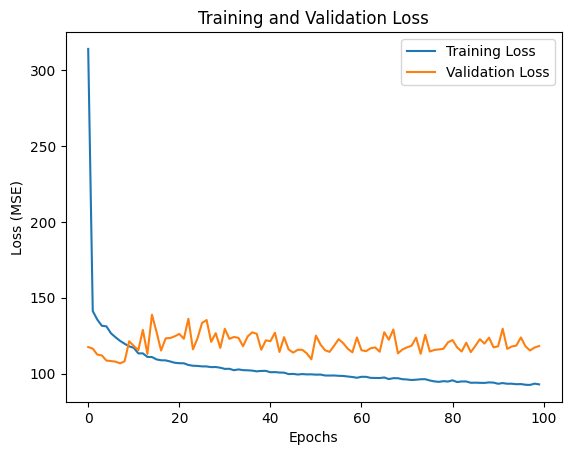

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [10]:
correlation_with_target = X_train.corrwith(y_train["hours-per-week"].squeeze())
selected_features = correlation_with_target[abs(correlation_with_target) > 0.1].index

X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_selected)
X_val_poly = poly.transform(X_val_selected)
X_test_poly = poly.transform(X_test_selected)

In [12]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define a function to build the model for keras_tuner
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32), activation="relu", input_shape=(X_train_poly.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units_2', min_value=16, max_value=64, step=16), activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), loss="mse", metrics=["mae"])
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='hours_per_week_regression'
)

# Perform the search
tuner.search(X_train_poly, y_train["hours-per-week"], epochs=50, validation_data=(X_val_poly, y_val["hours-per-week"]))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

Reloading Tuner from tuner_results\hours_per_week_regression\tuner0.json



c:\Users\Dan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Dan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [14]:
# Train the best model
best_model.fit(X_train_poly, y_train["hours-per-week"], epochs=50, validation_data=(X_val_poly, y_val["hours-per-week"]))

# Evaluate on test set
y_test_pred = best_model.predict(X_test_poly)

# Define the evaluation function
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred):
	mae = mean_absolute_error(y_true, y_pred)
	mse = mean_squared_error(y_true, y_pred)
	rmse = mse ** 0.5  # Calculate RMSE manually
	r2 = r2_score(y_true, y_pred)
	return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}

test_results = evaluate_model(y_test["hours-per-week"], y_test_pred)
print(test_results)

Epoch 1/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - loss: 117.7955 - mae: 7.6030 - val_loss: 117.4622 - val_mae: 7.4449
Epoch 2/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - loss: 114.5706 - mae: 7.4579 - val_loss: 117.6393 - val_mae: 7.4503
Epoch 3/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step - loss: 115.3396 - mae: 7.4318 - val_loss: 117.8688 - val_mae: 7.4009
Epoch 4/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step - loss: 114.0342 - mae: 7.4026 - val_loss: 118.4126 - val_mae: 7.5509
Epoch 5/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - loss: 117.2934 - mae: 7.5557 - val_loss: 118.1984 - val_mae: 7.5344
Epoch 6/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - loss: 113.7447 - mae: 7.4292 - val_loss: 117.9189 - val_mae: 7.4921
Epoch 7/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 115.1572 - mae: 7.4225 - val_loss: 117.4756 - val_mae: 7.4237
Epoch 8/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 114.2704 - mae: 7.4444 - val_loss: 117.4976 - val_mae: 7.4459
Epoch 9/50
6